In [2]:
# Torch Framework
import torch.nn as NN
import torch.optim as Optim

# User Defined Modules
import stock_rnn

# Useful Libraries
import os
import random
import numpy as np
import pickle as pkl
import plotly.express as px

from tqdm.notebook import tqdm

In [18]:
# Get Train Set

stock_matcher = dict()
stock_data_folder = './tensor_training_file/'

for file in tqdm(os.listdir(stock_data_folder)):
    stock_name = os.path.splitext(os.path.basename(file))[0]
    with open(stock_data_folder + file, 'rb') as f:
        stock_matcher[stock_name] = pkl.load(f)

stock_list = list(stock_matcher.keys())

In [417]:
HIDDEN_SIZE = 5
INPUT_SIZE = 5
OUTPUT_SIZE = 1

LEARNING_RATE = 1e-15
REGULARIZATION = 1e+4 # volume에 focusing되는걸 방지

rnn_model = stock_rnn.StockRNN(input_size = INPUT_SIZE, output_size = OUTPUT_SIZE, hidden_size = HIDDEN_SIZE)
optimizer = Optim.SGD(rnn_model.parameters(), lr = LEARNING_RATE, weight_decay = REGULARIZATION)
cost_ftn = NN.MSELoss()

In [418]:
ITERATION = 1000000
GRP_SIZE = 1000

loss_list = list()

In [425]:
total_loss = 0
for it in tqdm(range(1, ITERATION + 1)):
    stock_info = stock_rnn.choice_random_train(stock_matcher, stock_list)
    prediction = stock_rnn.evaluate_time_series(stock_info, rnn_model)
    
    cost = cost_ftn(prediction, stock_info['output'])
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    total_loss += cost.item()
    if it % GRP_SIZE == 0:
        loss_list.append(total_loss / GRP_SIZE)
#         print(f"Average loss: {total_loss / group_size:,.3f}")
#         print(f"Now Real Value: {stock_info['output']}")
#         print(f"Now Prediction: {prediction}")

        total_loss = 0
    break

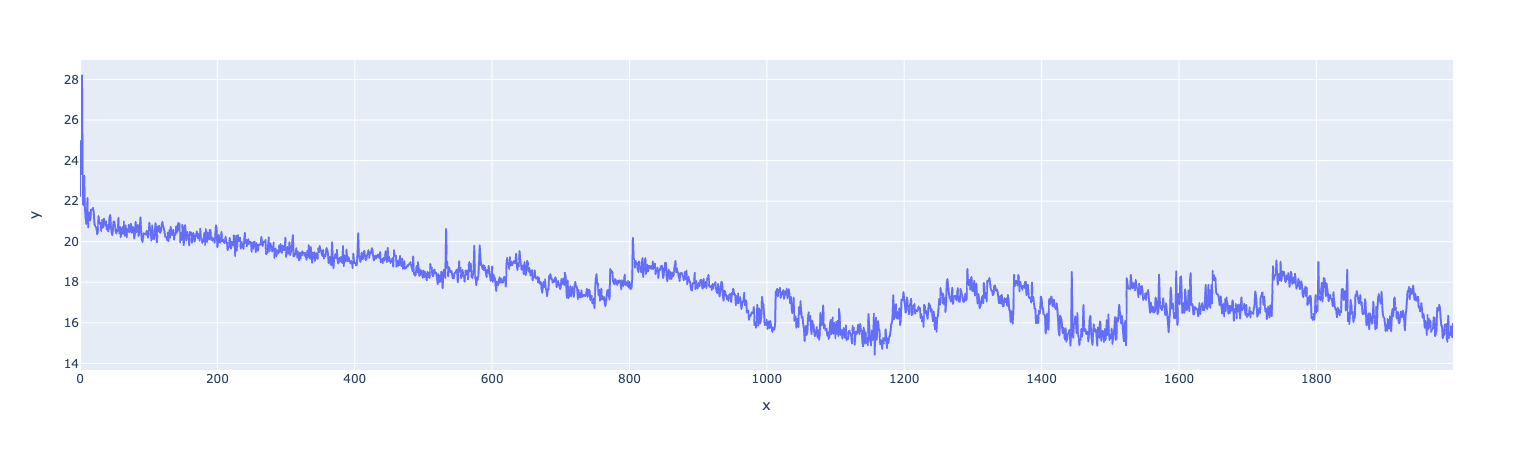

In [426]:
# 헉 Loss가 줄어들지 않아... 

px.line(y = np.log(loss_list))